In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
data = pd.read_csv('xAPI-Edu-Data.csv',sep = ',')

In [25]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<BarContainer object of 480 artists>

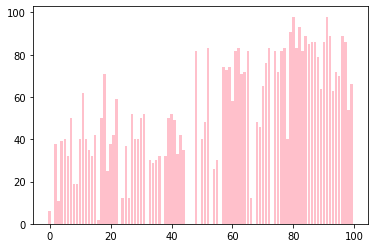

In [35]:
#plt.bar(data['raisedhands'], data['Class'], width = 0.8, color = ['yellow' for i in data['Class']],
           #edgecolor = ['blue' for i in data['Class']], linewidth = 2)
plt.bar(data['VisITedResources'], data['AnnouncementsView'], width = 0.8, color = ['pink' for i in data['Class']], linewidth = 4)
#plt.xticks([r + 0.8 / 2 for r in range(len(data['Class']))], ['A', 'B', 'C', 'D'])

### Transform numerical variables(raisedhands, VisITedRessources,AnnoucementsView,Discussion) to categorical ones 

In [4]:
def get_quartile(x):
    quartiles = pd.DataFrame(x.describe()).T
    return(quartiles['25%'],quartiles['50%'],quartiles['75%'])

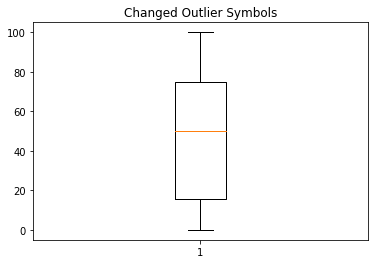

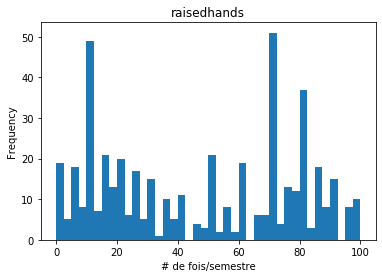

,count,mean,std,min,25%,50%,75%,max
raisedhands,480.0,46.775,30.779223,0.0,15.75,50.0,75.0,100.0


In [5]:
#Analyse des variables qualitatives
def hist_boxplot(x):
    green_diamond = dict(markerfacecolor='g', marker='D')
    plt.figure()
    plt.title('Changed Outlier Symbols')
    plt.boxplot(x, flierprops=green_diamond)
    plt.show
hist_boxplot(data['raisedhands'])

plt.figure()
data['raisedhands'].plot.hist(bins=40)
plt.title('raisedhands')
plt.xlabel('# de fois/semestre')
plt.show()
pd.DataFrame(data['raisedhands'].describe()).T



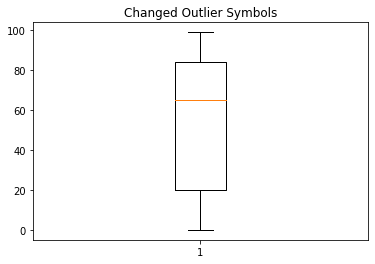

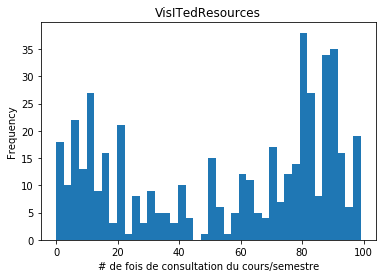

,count,mean,std,min,25%,50%,75%,max
VisITedResources,480.0,54.797917,33.080007,0.0,20.0,65.0,84.0,99.0


In [6]:
hist_boxplot(data['VisITedResources'])

plt.figure()
data['VisITedResources'].plot.hist(bins=40)
plt.title('VisITedResources')
plt.xlabel('# de fois de consultation du cours/semestre')
plt.show()
pd.DataFrame(data['VisITedResources'].describe()).T

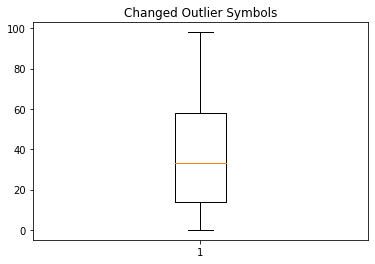

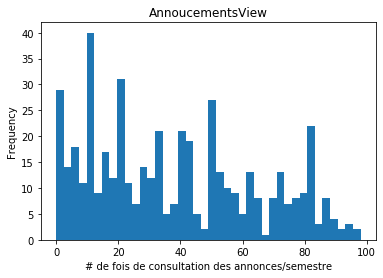

,count,mean,std,min,25%,50%,75%,max
AnnouncementsView,480.0,37.91875,26.611244,0.0,14.0,33.0,58.0,98.0


In [7]:
hist_boxplot(data['AnnouncementsView'])

plt.figure()
data['AnnouncementsView'].plot.hist(bins=40)
plt.title('AnnoucementsView')
plt.xlabel('# de fois de consultation des annonces/semestre')
plt.show()
pd.DataFrame(data['AnnouncementsView'].describe()).T

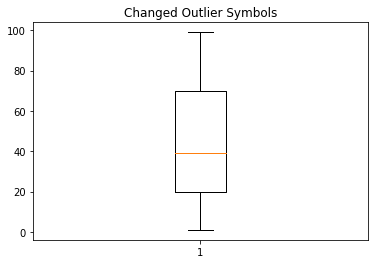

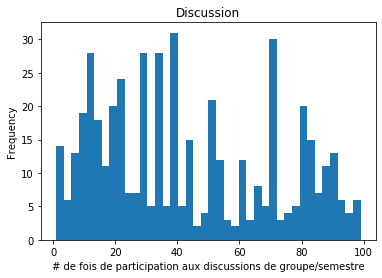

,count,mean,std,min,25%,50%,75%,max
Discussion,480.0,43.283333,27.637735,1.0,20.0,39.0,70.0,99.0


In [8]:
hist_boxplot(data['Discussion'])

plt.figure()
data['Discussion'].plot.hist(bins=40)
plt.title('Discussion')
plt.xlabel('# de fois de participation aux discussions de groupe/semestre')
plt.show()
pd.DataFrame(data['Discussion'].describe()).T

### Fonctions to transform the variables 

In [9]:
#q1,q2,q3 = get_quartile(data['raisedhands'])


In [10]:
def raisedhands_to_quali(x):
    if( x <= 15.75):
        x = 'raised_hnds_peu'
    elif((x > 15.75) & (x <= 50.0)):
        x = 'raised_hnds_moyen'
    else:
        x = 'raised_hnds_souvent'
    return(x)

In [11]:
def VisitedRrcs_to_quali(x):
    if( x <= 20.0):
        x = 'vistdrsc_peu'
    elif((x > 20.0) & (x <= 65.0)):
        x = 'vistdrsc_moyen'
    else:
        x = 'vistdrsc_souvent'
    return(x)

In [12]:
def View_annoncmnts_to_quali(x):
    if( x <= 33.0):
        x = 'V_annoncmnt_peu'
    elif((x > 33.0) & (x <= 58.0)):
        x = 'V_annoncmnt_moyen'
    else:
        x = 'V_annoncmnt_souvent'
    return(x)

In [13]:
def Discussion_to_quali(x):
    if( x <= 20.0):
        x = 'discussion_peu'
    elif((x > 20.0) & (x <= 43.28)): # from q1 to mean
        x = 'discussion_moyen'
    else:
        x = 'discussion_souvent'
    return(x)

In [14]:
#Change in the initiale data
data['raisedhands'] = data['raisedhands'].apply(raisedhands_to_quali)
data['VisITedResources'] = data['VisITedResources'].apply(VisitedRrcs_to_quali)
data['AnnouncementsView'] = data['AnnouncementsView'].apply(View_annoncmnts_to_quali)
data['Discussion'] = data['Discussion'].apply(Discussion_to_quali)

In [15]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,raised_hnds_peu,vistdrsc_peu,V_annoncmnt_peu,discussion_peu,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,raised_hnds_moyen,vistdrsc_peu,V_annoncmnt_peu,discussion_moyen,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,raised_hnds_peu,vistdrsc_peu,V_annoncmnt_peu,discussion_moyen,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,raised_hnds_moyen,vistdrsc_moyen,V_annoncmnt_peu,discussion_moyen,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,raised_hnds_moyen,vistdrsc_moyen,V_annoncmnt_peu,discussion_souvent,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,raised_hnds_peu,vistdrsc_peu,V_annoncmnt_peu,discussion_peu,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,raised_hnds_moyen,vistdrsc_souvent,V_annoncmnt_peu,discussion_moyen,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,raised_hnds_souvent,vistdrsc_souvent,V_annoncmnt_peu,discussion_moyen,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,raised_hnds_moyen,vistdrsc_peu,V_annoncmnt_peu,discussion_souvent,No,Bad,Above-7,L


In [16]:
data['NationalITy'] != 'KW'

0      False
1      False
2      False
3      False
4      False
       ...  
475     True
476     True
477     True
478     True
479     True
Name: NationalITy, Length: 480, dtype: bool

### Regroupements 

In [17]:
#Regroupement de la variable nationnality
def rgp_nationality(x):
    if((x != 'KW') & (x != 'Jordan')):
        x = 'Others'
    return(x)

#Regroupement de la variable place_of_birth
def rgp_birth(x):
    if((x != 'KuwaIT') & (x != 'Jordan')):
        x = 'others'
    return(x)

#Regroupement de la variable Grades selon le système international:
#G01-03: Grades1
#G04-06: Grades2
#G07-09: Grades3
#G09-12: Grades4

def rgp_grade(x):
    int_grade = int(x.split('-')[1])
    if(int_grade  <= 3):
        x = 'Grades1'
    elif(int_grade >=4 & int_grade <=6):
        x = 'Grades2'
    elif(int_grade >=7 & int_grade <=9):
        x = 'Grades3'
    else:
        x = 'Grades4'
    return(x)


In [18]:
#Faudra changer Jordan dans l une des colonnes place of birth ou nationality pour pouvoir les differencier 
def jordan(x):
    if(x == 'Jordan'):
        x = 'JRD'
    return(x)


In [19]:
data['NationalITy'] = data['NationalITy'].apply(rgp_nationality)
data['PlaceofBirth'] = data['PlaceofBirth'].apply(rgp_birth)
data['GradeID'] = data['GradeID'].apply(rgp_grade)
data['NationalITy'] = data['NationalITy'].apply(jordan)
#supprimer la variables StageID car contient de l info contenue dans GradeID
data= data.drop(['StageID','PlaceofBirth'],axis = 1)

In [20]:
f_data_transformed = pd.DataFrame(data.to_csv ('/Applications/SASUniversityEdition/myfolders/donnees_qualiy/data_transformed.csv',index = None, header=True,sep = ','))

In [21]:
data

,gender,NationalITy,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,Grades2,A,IT,F,Father,raised_hnds_peu,vistdrsc_peu,V_annoncmnt_peu,discussion_peu,Yes,Good,Under-7,M
1,M,KW,Grades2,A,IT,F,Father,raised_hnds_moyen,vistdrsc_peu,V_annoncmnt_peu,discussion_moyen,Yes,Good,Under-7,M
2,M,KW,Grades2,A,IT,F,Father,raised_hnds_peu,vistdrsc_peu,V_annoncmnt_peu,discussion_moyen,No,Bad,Above-7,L
3,M,KW,Grades2,A,IT,F,Father,raised_hnds_moyen,vistdrsc_moyen,V_annoncmnt_peu,discussion_moyen,No,Bad,Above-7,L
4,M,KW,Grades2,A,IT,F,Father,raised_hnds_moyen,vistdrsc_moyen,V_annoncmnt_peu,discussion_souvent,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,JRD,Grades2,A,Chemistry,S,Father,raised_hnds_peu,vistdrsc_peu,V_annoncmnt_peu,discussion_peu,No,Bad,Above-7,L
476,F,JRD,Grades2,A,Geology,F,Father,raised_hnds_moyen,vistdrsc_souvent,V_annoncmnt_peu,discussion_moyen,No,Bad,Under-7,M
477,F,JRD,Grades2,A,Geology,S,Father,raised_hnds_souvent,vistdrsc_souvent,V_annoncmnt_peu,discussion_moyen,No,Bad,Under-7,M
478,F,JRD,Grades2,A,History,F,Father,raised_hnds_moyen,vistdrsc_peu,V_annoncmnt_peu,discussion_souvent,No,Bad,Above-7,L
